In [31]:
################################
# Solves - u'' + u = f         #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [32]:
# Parameters
d = 1
k = 2
inner = 4
outer = 10
start_delta = 1.
start_N = 101

# Computed Parameters
ranges = ((a, b),) * d
centre_thinning = 2 ** np.arange(inner)
delta_thinning = 2. ** np.arange(inner)
xcs = [rad.gridinc(ranges, inc, flat=True) for inc in (b - a) / (centre_thinning * (start_N - 1))]
deltas = start_delta / delta_thinning
idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda rbf, *args: - rbf.laplacian(*args) + rbf(*args),
    lambda rbf, *args: rbf(*args),
]

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
solver = rad.solve.MultilevelSolver(d, k, deltas, xcs, outer, rad.solve.CollocationSolver, operators, idx_funcs)
approx = solver.solve(f, g)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 77.02386627292397
Condition Number: [3093.5934450808413, 13903.793750181912, 51569.603187556604, 686646.3303911429]


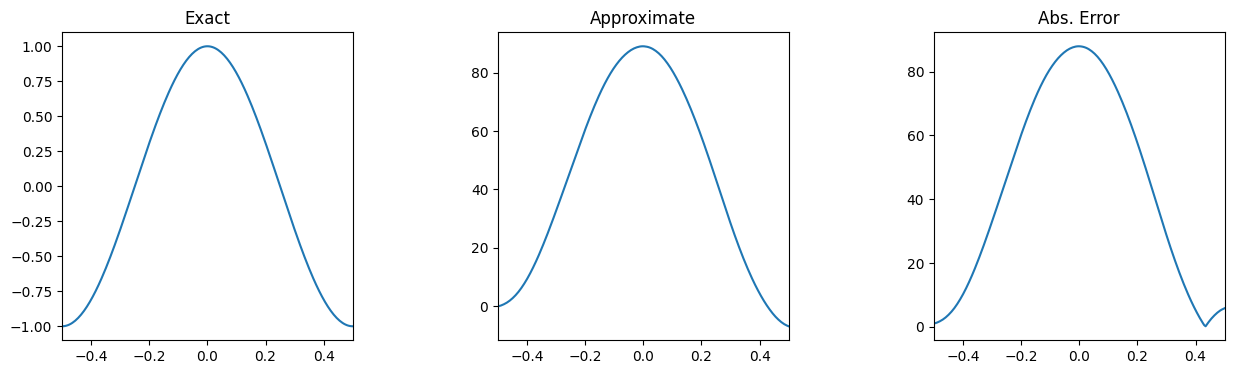

In [33]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x )),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4),
)

Once 
 
 Loop 
 
 Reflect

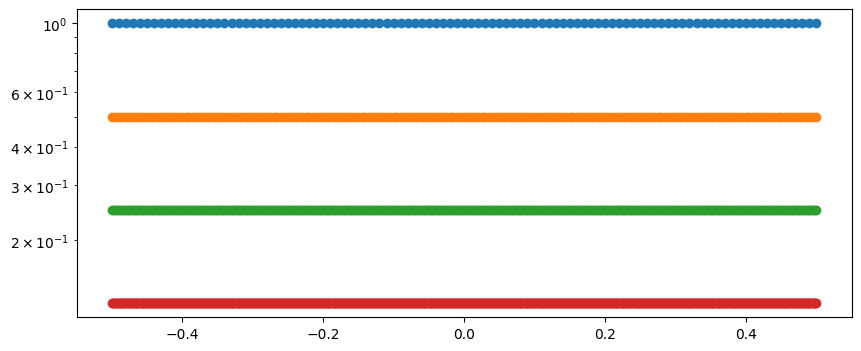

In [34]:
if d == 1:
    from IPython.display import HTML, display_html
    
    
    anim = rad.animate.ml_animate(ranges, exact, approx, n=200, figsize=(10, 4))
    display_html(HTML(anim.to_jshtml()))
    
    rad.plot.thinning(deltas, xcs, d, figsize=(10, 4))

In [35]:
print(xcs[0][idxs[1]].shape)

NameError: name 'idxs' is not defined